<a href="https://colab.research.google.com/github/stephanie0620/113_1/blob/main/%E9%87%91%E8%9E%8D%E5%A4%A7%E6%95%B8%E6%93%9A%E5%88%86%E6%9E%90/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 使用 yfinance 抓取股價資料

In [18]:
import yfinance as yf
import pandas as pd

def get_stock_data(stock_id, start_date, end_date):
    '''
    使用 yfinance 抓取股價資料

    參數：
    - stock_id (str): 股票代號
    - start_date (str): 開始日期 (YYYY-MM-DD)
    - end_date (str): 結束日期 (YYYY-MM-DD)

    返回：
    - df (DataFrame): 包含股價資料的 DataFrame
    '''
    df = yf.download(stock_id, start=start_date, end=end_date)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    df.columns = ['開盤價', '最高價', '最低價', '收盤價', '成交量']
    return df


In [19]:
# 抓取台積電 2024 年的股價
df = get_stock_data('2330.TW', '2024-01-01', '2024-09-30')
df.head()

[*********************100%***********************]  1 of 1 completed


,開盤價,最高價,最低價,收盤價,成交量
Date,,,,,
2024-01-02,590.0,593.0,589.0,593.0,26059058
2024-01-03,584.0,585.0,576.0,578.0,37106763
2024-01-04,580.0,581.0,577.0,580.0,15309129
2024-01-05,578.0,580.0,574.0,576.0,18158971
2024-01-08,582.0,585.0,579.0,583.0,17761275


## 計算技術指標

###  SMA（簡單移動平均線）

> 簡單移動平均合計n期間的收盤價，然後再除以n計算得出。



In [20]:
def calculate_sma(df, period=14):
    column_name = f'{period}_SMA'  # 使用 f-string 來拼接 period 和 'SMA'
    df[column_name] = df['收盤價'].rolling(window=period).mean()
    return df

In [21]:
df = calculate_sma(df, 5)
df = calculate_sma(df, 10)
df = calculate_sma(df, 20)
df = calculate_sma(df, 30)
df.head(30)

,開盤價,最高價,最低價,收盤價,成交量,5_SMA,10_SMA,20_SMA,30_SMA
Date,,,,,,,,,
2024-01-02,590.0,593.0,589.0,593.0,26059058,NaN,NaN,NaN,NaN
2024-01-03,584.0,585.0,576.0,578.0,37106763,NaN,NaN,NaN,NaN
2024-01-04,580.0,581.0,577.0,580.0,15309129,NaN,NaN,NaN,NaN
2024-01-05,578.0,580.0,574.0,576.0,18158971,NaN,NaN,NaN,NaN
2024-01-08,582.0,585.0,579.0,583.0,17761275,582.0,NaN,NaN,NaN
2024-01-09,588.0,589.0,583.0,586.0,22501510,580.6,NaN,NaN,NaN
2024-01-10,581.0,586.0,580.0,584.0,13037716,581.8,NaN,NaN,NaN
2024-01-11,586.0,589.0,583.0,586.0,23997409,583.0,NaN,NaN,NaN
2024-01-12,581.0,588.0,581.0,584.0,16496053,584.6,NaN,NaN,NaN


### RSI（相對強弱指標）


> RSI 公式： （一定時間內）漲幅平均值 ÷〔 （一定時間內）漲幅平均值 ＋（一定時間內）日跌幅平均值 〕× 100



In [22]:
def calculate_rsi(df, period=14):
    column_name = f'{period}_RSI'
    delta = df['收盤價'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    df[column_name] = 100 - (100 / (1 + rs))
    return df

In [23]:
df = calculate_rsi(df, 5)
df = calculate_rsi(df, 10)
df = calculate_rsi(df, 20)
df = calculate_rsi(df, 30)
df.head(30)

,開盤價,最高價,最低價,收盤價,成交量,5_SMA,10_SMA,20_SMA,30_SMA,5_RSI,10_RSI,20_RSI,30_RSI
Date,,,,,,,,,,,,,
2024-01-02,590.0,593.0,589.0,593.0,26059058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-03,584.0,585.0,576.0,578.0,37106763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-04,580.0,581.0,577.0,580.0,15309129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-05,578.0,580.0,574.0,576.0,18158971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-08,582.0,585.0,579.0,583.0,17761275,582.0,NaN,NaN,NaN,32.142857,NaN,NaN,NaN
2024-01-09,588.0,589.0,583.0,586.0,22501510,580.6,NaN,NaN,NaN,38.709677,NaN,NaN,NaN
2024-01-10,581.0,586.0,580.0,584.0,13037716,581.8,NaN,NaN,NaN,66.666667,NaN,NaN,NaN
2024-01-11,586.0,589.0,583.0,586.0,23997409,583.0,NaN,NaN,NaN,66.666667,NaN,NaN,NaN
2024-01-12,581.0,588.0,581.0,584.0,16496053,584.6,NaN,NaN,NaN,75.000000,NaN,NaN,NaN


### MACD（移動平均線指數）


> 指數平滑異同移動平均線（ Moving Average Convergence / Divergence ）透過計算「收盤時股價或指數變化的指數移動平均值（ EMA ）」之間的離差程度（ DIF ）



> df['MACD'] 是快速線，反映短期趨勢相對於長期趨勢的變化。

> df['MACD_signal'] 是平滑後的信號線，用來幫助判斷趨勢變化的時機。







In [24]:
def calculate_macd(df, short_period=12, long_period=26, signal_period=9):
    df['EMA_short'] = df['收盤價'].ewm(span=short_period, adjust=False).mean()
    df['EMA_long'] = df['收盤價'].ewm(span=long_period, adjust=False).mean()
    df['MACD'] = df['EMA_short'] - df['EMA_long']
    df['MACD_signal'] = df['MACD'].ewm(span=signal_period, adjust=False).mean()
    return df

In [25]:
df = calculate_macd(df)
df.head(30)

,開盤價,最高價,最低價,收盤價,成交量,5_SMA,10_SMA,20_SMA,30_SMA,5_RSI,10_RSI,20_RSI,30_RSI,EMA_short,EMA_long,MACD,MACD_signal
Date,,,,,,,,,,,,,,,,,
2024-01-02,590.0,593.0,589.0,593.0,26059058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,593.000000,593.000000,0.000000,0.000000
2024-01-03,584.0,585.0,576.0,578.0,37106763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,590.692308,591.888889,-1.196581,-0.239316
2024-01-04,580.0,581.0,577.0,580.0,15309129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,589.047337,591.008230,-1.960893,-0.583632
2024-01-05,578.0,580.0,574.0,576.0,18158971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,587.040055,589.896510,-2.856455,-1.038196
2024-01-08,582.0,585.0,579.0,583.0,17761275,582.0,NaN,NaN,NaN,32.142857,NaN,NaN,NaN,586.418508,589.385657,-2.967149,-1.423987
2024-01-09,588.0,589.0,583.0,586.0,22501510,580.6,NaN,NaN,NaN,38.709677,NaN,NaN,NaN,586.354122,589.134868,-2.780746,-1.695339
2024-01-10,581.0,586.0,580.0,584.0,13037716,581.8,NaN,NaN,NaN,66.666667,NaN,NaN,NaN,585.991949,588.754507,-2.762558,-1.908783
2024-01-11,586.0,589.0,583.0,586.0,23997409,583.0,NaN,NaN,NaN,66.666667,NaN,NaN,NaN,585.993188,588.550470,-2.557282,-2.038482
2024-01-12,581.0,588.0,581.0,584.0,16496053,584.6,NaN,NaN,NaN,75.000000,NaN,NaN,NaN,585.686544,588.213398,-2.526854,-2.136157


## K 線圖的可視化

In [26]:
import plotly.graph_objects as go

def plot_k_line(df):
    '''
    繪製 K 線圖

    參數：
    - df (DataFrame): 包含開盤、收盤、最高、最低價的資料
    '''
    fig = go.Figure(data=[go.Candlestick(x=df.index,
                                         open=df['開盤價'],
                                         high=df['最高價'],
                                         low=df['最低價'],
                                         close=df['收盤價'])])

    fig.update_layout(title='K Line Chart', xaxis_title='Date', yaxis_title='Price')
    fig.show()

In [27]:
# 繪製 K 線圖
plot_k_line(df)

### 技術指標可視化

In [34]:
df['日期'] = df.index
df.head(10)

,開盤價,最高價,最低價,收盤價,成交量,5_SMA,10_SMA,20_SMA,30_SMA,5_RSI,10_RSI,20_RSI,30_RSI,EMA_short,EMA_long,MACD,MACD_signal,日期
Date,,,,,,,,,,,,,,,,,,
2024-01-02,590.0,593.0,589.0,593.0,26059058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,593.000000,593.000000,0.000000,0.000000,2024-01-02
2024-01-03,584.0,585.0,576.0,578.0,37106763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,590.692308,591.888889,-1.196581,-0.239316,2024-01-03
2024-01-04,580.0,581.0,577.0,580.0,15309129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,589.047337,591.008230,-1.960893,-0.583632,2024-01-04
2024-01-05,578.0,580.0,574.0,576.0,18158971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,587.040055,589.896510,-2.856455,-1.038196,2024-01-05
2024-01-08,582.0,585.0,579.0,583.0,17761275,582.0,NaN,NaN,NaN,32.142857,NaN,NaN,NaN,586.418508,589.385657,-2.967149,-1.423987,2024-01-08
2024-01-09,588.0,589.0,583.0,586.0,22501510,580.6,NaN,NaN,NaN,38.709677,NaN,NaN,NaN,586.354122,589.134868,-2.780746,-1.695339,2024-01-09
2024-01-10,581.0,586.0,580.0,584.0,13037716,581.8,NaN,NaN,NaN,66.666667,NaN,NaN,NaN,585.991949,588.754507,-2.762558,-1.908783,2024-01-10
2024-01-11,586.0,589.0,583.0,586.0,23997409,583.0,NaN,NaN,NaN,66.666667,NaN,NaN,NaN,585.993188,588.550470,-2.557282,-2.038482,2024-01-11
2024-01-12,581.0,588.0,581.0,584.0,16496053,584.6,NaN,NaN,NaN,75.000000,NaN,NaN,NaN,585.686544,588.213398,-2.526854,-2.136157,2024-01-12


In [35]:
import matplotlib.pyplot as plt

def plot_technical_indicators(df, indicators):
    '''
    繪製指定技術指標的折線圖。

    參數：
    - df (DataFrame): 包含股價與技術指標的資料
    - indicators (list of str): 想要繪製的技術指標名稱列表，例如 ['SMA', 'RSI', 'MACD']

    返回：
    - 無，直接顯示圖表
    '''
    plt.figure(figsize=(14, 7))

    # 檢查並繪製每個指標
    for indicator in indicators:
        if indicator in df.columns:
            plt.plot(df['日期'], df[indicator], label=indicator)

    # 設定圖表標題與標籤
    plt.title('Technical Indicators')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.xticks(rotation=45)

    # 顯示圖例
    plt.legend(loc='upper left')

    # 顯示網格線
    plt.grid(True)

    # 顯示圖表
    plt.tight_layout()
    plt.show()


In [36]:
df.columns

Index(['開盤價', '最高價', '最低價', '收盤價', '成交量', '5_SMA', '10_SMA', '20_SMA',
       '30_SMA', '5_RSI', '10_RSI', '20_RSI', '30_RSI', 'EMA_short',
       'EMA_long', 'MACD', 'MACD_signal', '日期'],
      dtype='object')

<ipython-input-35-b7c7a4125fc7>:34: UserWarning:

Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.

<ipython-input-35-b7c7a4125fc7>:34: UserWarning:

Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.

<ipython-input-35-b7c7a4125fc7>:34: UserWarning:

Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.



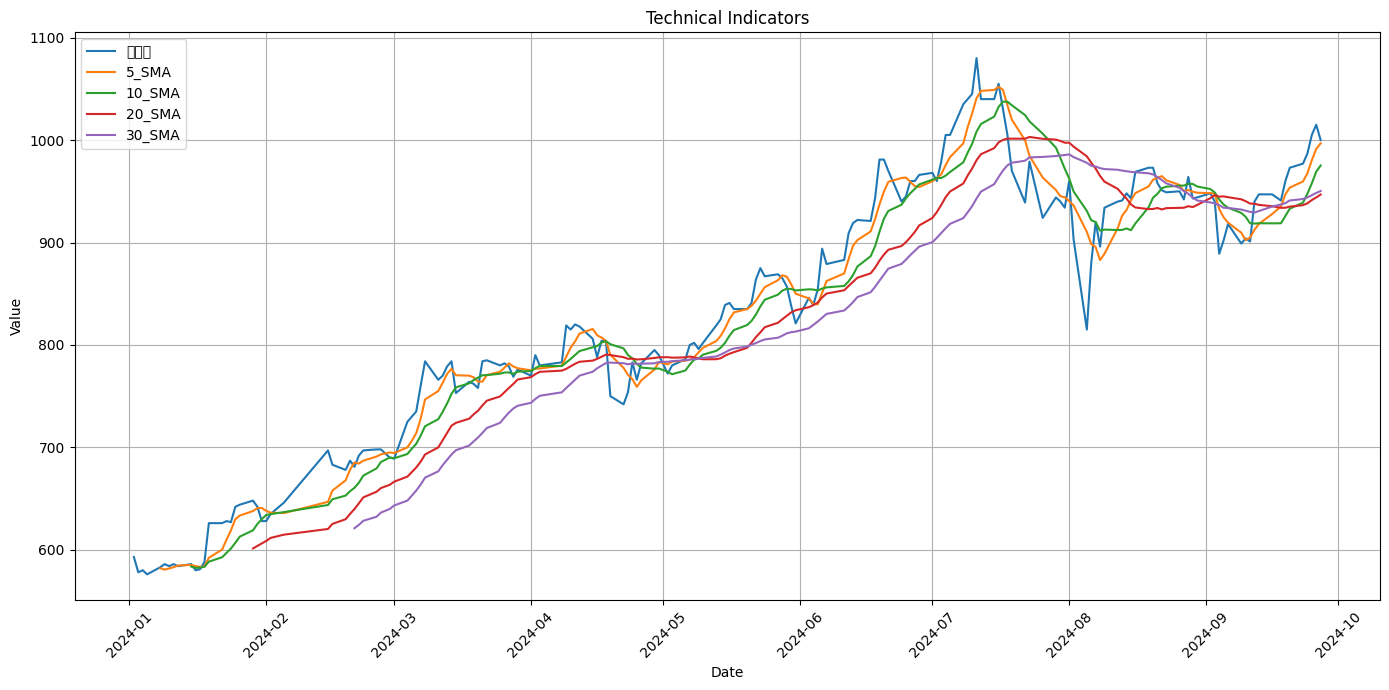

In [39]:
# 繪製 SMA
plot_technical_indicators(df, [ '收盤價', '5_SMA', '10_SMA', '20_SMA', '30_SMA',])

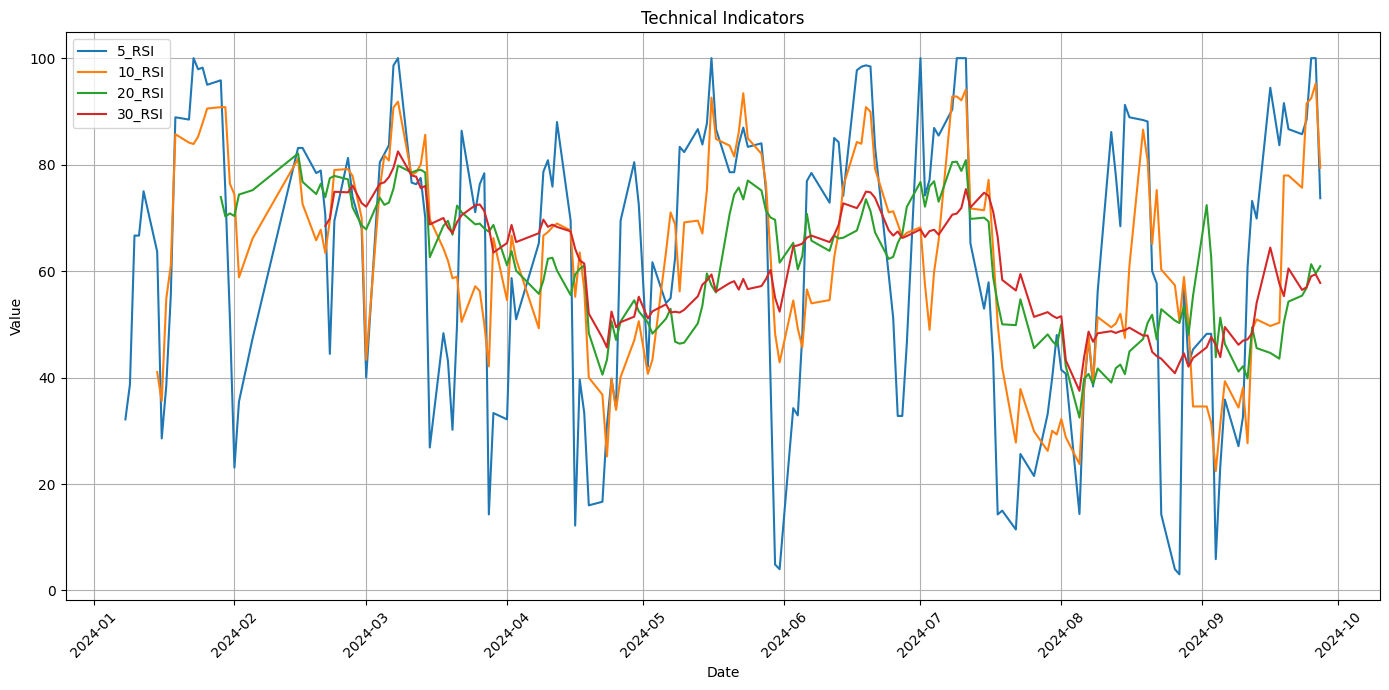

In [40]:
plot_technical_indicators(df, ['5_RSI', '10_RSI', '20_RSI', '30_RSI'])

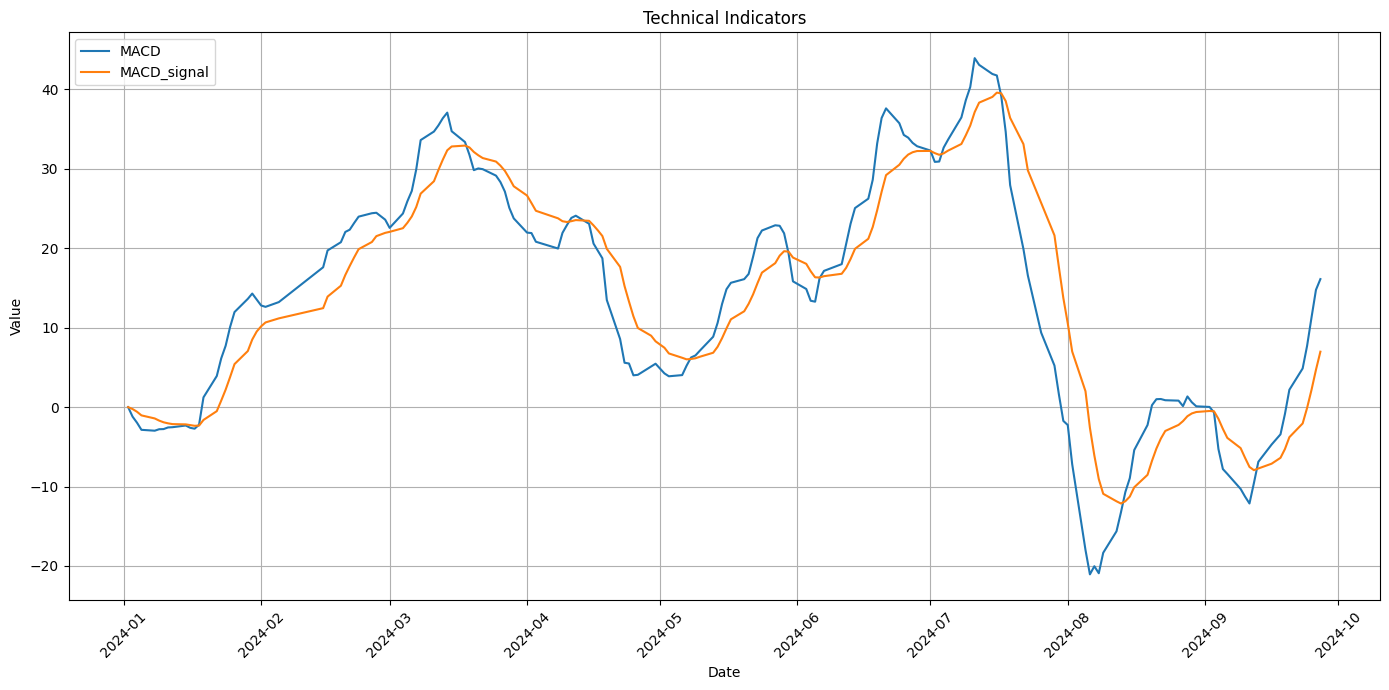

In [41]:
plot_technical_indicators(df, ['MACD', 'MACD_signal'])

## 技術指標結合機器學習

### 準備特徵和標籤

In [42]:
df.columns

Index(['開盤價', '最高價', '最低價', '收盤價', '成交量', '5_SMA', '10_SMA', '20_SMA',
       '30_SMA', '5_RSI', '10_RSI', '20_RSI', '30_RSI', 'EMA_short',
       'EMA_long', 'MACD', 'MACD_signal', '日期'],
      dtype='object')

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def prepare_features_for_n_day_prediction(df, n=1):
    '''
    準備特徵和標籤，來預測第 n 天的股價

    參數：
    - df (DataFrame): 包含股價與技術指標的資料
    - n (int): 預測 n 天後的股價

    返回：
    - X (DataFrame): 特徵
    - y (Series): 標籤（n 天後的股價）
    '''
    # 將 n 天後的收盤價作為標籤
    df['Target'] = df['收盤價'].shift(-n)

    # 特徵集為技術指標
    features = ['5_SMA', '10_SMA', '20_SMA', '30_SMA', '5_RSI', '10_RSI', '20_RSI', '30_RSI', 'MACD', 'MACD_signal']

    # 去除 NaN 值的行
    X = df[features].dropna()
    y = df['Target'].dropna()

    # 使用交集來確保 X 和 y 的索引一致
    common_index = X.index.intersection(y.index)

    # 基於共同索引來過濾 X 和 y
    X = X.loc[common_index]
    y = y.loc[common_index]

    return X, y

### 機器學習模型

In [69]:
def predict_stock_price(X, y, model):
    '''
    使用回歸模型預測第 n 天的股價，並返回預測結果與實際結果。

    參數：
    - X (DataFrame): 特徵
    - y (Series): 標籤（n 天後的股價）
    - model: 回歸模型

    返回：
    - y_test (Series): 實際值
    - y_pred (Series): 預測值
    - mse (float): 預測的均方誤差
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 訓練模型
    model.fit(X_train, y_train)

    # 進行預測
    y_pred = model.predict(X_test)

    # 計算均方誤差
    mse = mean_squared_error(y_test, y_pred)

    return y_test, y_pred, mse

In [78]:
import matplotlib.pyplot as plt
import numpy as np

def plot_actual_vs_predicted(y_test, y_pred, model_name='Model'):
    '''
    繪製實際股價與預測股價的對比圖。

    參數：
    - y_test (Series): 實際股價
    - y_pred (Series): 預測股價
    - model_name (str): 模型名稱，用於圖表標題
    '''

    # 將實際股價與預測股價根據日期進行排序
    y_test_sorted = y_test.sort_index()

    # 按照排序後的 y_test 的順序對應的 y_pred
    y_pred_sorted = [y_pred[i] for i in range(len(y_test_sorted))]

    plt.figure(figsize=(14, 7))

    # 繪製實際股價
    plt.plot(y_test_sorted.index, y_test_sorted.values, label='Actual Price', color='blue', marker='o')

    # 繪製預測股價
    plt.plot(y_test_sorted.index, y_pred_sorted, label='Predicted Price', color='red', linestyle='--', marker='x')

    # 設定圖表標題和標籤
    plt.title(f'{model_name} - Actual vs Predicted Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='upper left')

    # 顯示圖表
    plt.grid(True)
    plt.show()


In [82]:
# 準備數據以預測未來n天的股價
X, y = prepare_features_for_n_day_prediction(df, n=3)
print(X.shape)
print(y.shape)

(147, 10)
(147,)


Linear Regression MSE: 421.97700144115777
Linear Regression RMSE: 20.54207880038332
-----------------------------------------


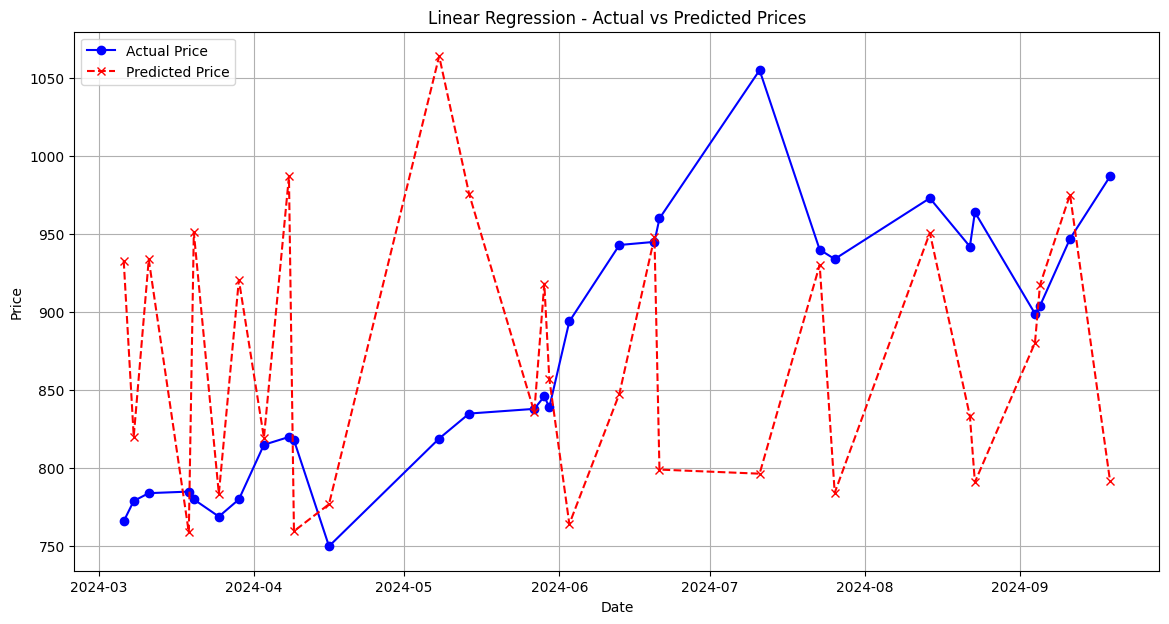

In [83]:
# 使用線性回歸模型預測
lr_model = LinearRegression()
y_test, y_pred, mse_lr = predict_stock_price(X, y, lr_model)

# 計算 RMSE
rmse_lr = np.sqrt(mse_lr)
print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression RMSE: {rmse_lr}')
print('-----------------------------------------')

# 繪製實際股價與預測股價的對比圖
plot_actual_vs_predicted(y_test, y_pred, model_name='Linear Regression')

Decision Tree Regression MSE: 618.9
Decision Tree Regression RMSE: 24.877700858399272
-----------------------------------------


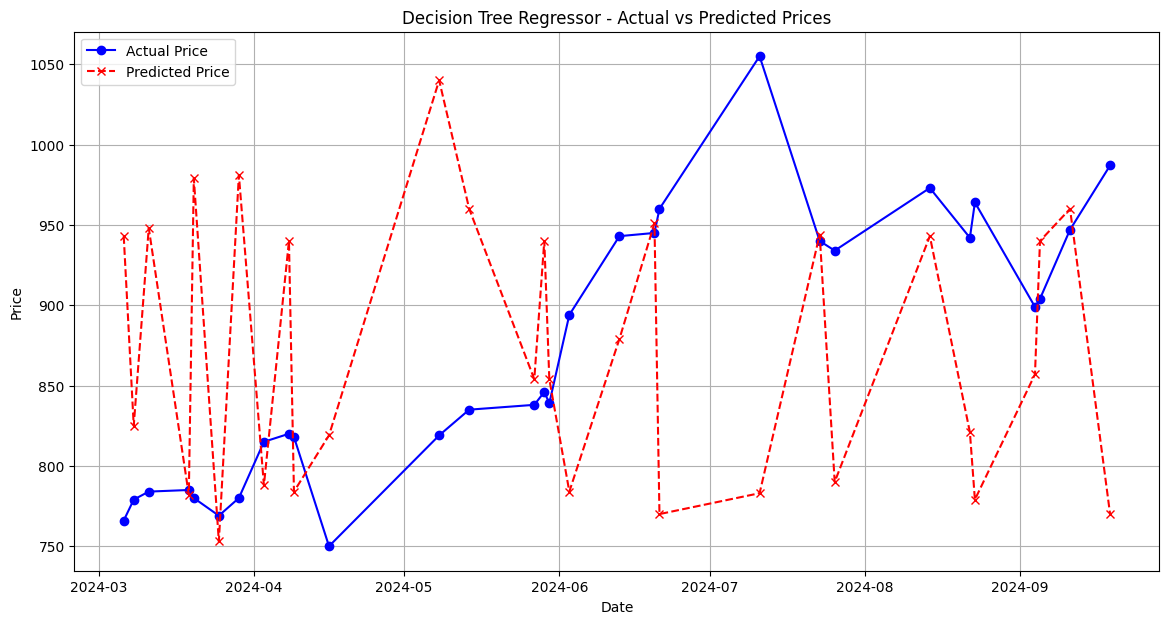

In [84]:
# 使用決策樹回歸模型預測
dt_model = DecisionTreeRegressor()
y_test_dt, y_pred_dt, mse_dt = predict_stock_price(X, y, dt_model)

# 計算 RMSE
rmse_dt = np.sqrt(mse_dt)
print(f'Decision Tree Regression MSE: {mse_dt}')
print(f'Decision Tree Regression RMSE: {rmse_dt}')
print('-----------------------------------------')

# 繪製實際股價與預測股價的對比圖
plot_actual_vs_predicted(y_test_dt, y_pred_dt, model_name='Decision Tree Regressor')

Random Forest Regression MSE: 261.7486133333336
Random Forest Regression RMSE: 16.178646832579467
-----------------------------------------


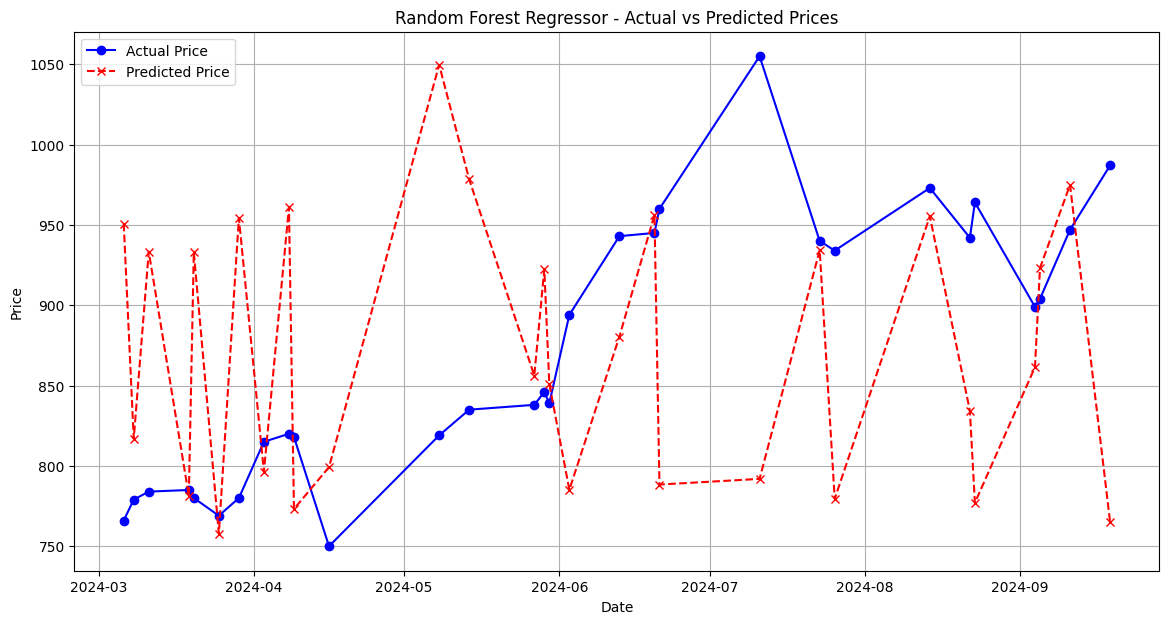

In [85]:
# 使用隨機森林回歸模型預測
rf_model = RandomForestRegressor()
y_test_rf, y_pred_rf, mse_rf = predict_stock_price(X, y, rf_model)

# 計算 RMSE
rmse_rf = np.sqrt(mse_rf)
print(f'Random Forest Regression MSE: {mse_rf}')
print(f'Random Forest Regression RMSE: {rmse_rf}')
print('-----------------------------------------')

# 繪製實際股價與預測股價的對比圖
plot_actual_vs_predicted(y_test_rf, y_pred_rf, model_name='Random Forest Regressor')